# AIDM7330 Group Project 

This project will contain three part: 1)scraptying data, 2)data visualization, 3)data uopload to Goolge sheet via webdrive

We will ass the features of each apartment and visualize them, and the chart will show the rent is expensive or cheap. Also,our goal is to help provide a real-time view of the rental market, $3000 per month at least, in 7 cities in USA. 

## Scrapying the data from zillow

In [1]:
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup

In [2]:
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36",
    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8"
}
results = []
for page in range(1, 50):
  url = 'https://www.zillow.com/search/GetSearchPageState.htm?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A' + str(page) + '%7D%2C%22mapBounds%22%3A%7B%22west%22%3A-122.68750190734863%2C%22east%22%3A-122.14779853820801%2C%22south%22%3A37.70453488762476%2C%22north%22%3A37.8483580821288%7D%2C%22mapZoom%22%3A11%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22price%22%3A%7B%22min%22%3A0%2C%22max%22%3A904898%7D%2C%22beds%22%3A%7B%22min%22%3A1%7D%2C%22isForSaleForeclosure%22%3A%7B%22value%22%3Afalse%7D%2C%22monthlyPayment%22%3A%7B%22min%22%3A0%2C%22max%22%3A3000%7D%2C%22isAllHomes%22%3A%7B%22value%22%3Atrue%7D%2C%22isAuction%22%3A%7B%22value%22%3Afalse%7D%2C%22isNewConstruction%22%3A%7B%22value%22%3Afalse%7D%2C%22isForRent%22%3A%7B%22value%22%3Atrue%7D%2C%22isForSaleByOwner%22%3A%7B%22value%22%3Afalse%7D%2C%22isComingSoon%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByAgent%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%7D&wants={%22cat1%22:[%22listResults%22,%22mapResults%22]}&requestId=18'
  page = requests.get(url,headers=headers)
  data = page.json()
  results.extend(data["cat1"]["searchResults"]["listResults"])

In [ ]:
fp = open("data.json", "w")
json.dump(results, fp)
fp.close()

In [4]:
houses = pd.DataFrame(results)
houses.to_csv("./house50.csv")

In [5]:
houses.head()

,zpid,id,lotId,imgSrc,hasImage,statusType,statusText,detailUrl,latLong,units,...,pgapt,sgapt,zestimate,shouldShowZestimateAsPrice,hasVideo,isHomeRec,hasAdditionalAttributions,availabilityDate,streetViewMetadataURL,streetViewURL
0,37.772366--122.397049,37.772366--122.397049,1.001487e+09,https://photos.zillowstatic.com/fp/20dba35fc3e...,True,FOR_RENT,Edgewater,/b/edgewater-san-francisco-ca-5XjVQc/,"{'latitude': 37.772366, 'longitude': -122.397049}","[{'price': '$2,599+', 'beds': '1'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2096177591,2096177591,NaN,https://photos.zillowstatic.com/fp/e0ce77c6982...,True,FOR_RENT,Apartment for rent,https://www.zillow.com/homedetails/196-41st-St...,"{'latitude': 37.8276, 'longitude': -122.253554}",NaN,...,ForRent,For Rent,NaN,False,False,False,False,None,NaN,NaN
2,2067439886,2067439886,NaN,https://photos.zillowstatic.com/fp/90a87745770...,True,FOR_RENT,Townhouse for rent,https://www.zillow.com/homedetails/1920-69th-A...,"{'latitude': 37.764105, 'longitude': -122.184497}",NaN,...,ForRent,For Rent,NaN,False,False,False,False,2021-12-01 00:00:00,NaN,NaN
3,24749022,24749022,NaN,https://photos.zillowstatic.com/fp/766b8661df3...,True,FOR_RENT,Apartment for rent,https://www.zillow.com/homedetails/1-Kelton-Ct...,"{'latitude': 37.824261, 'longitude': -122.250821}",NaN,...,ForRent,For Rent,NaN,False,False,False,False,2021-12-22 00:00:00,NaN,NaN
4,37.795598--122.234969,37.795598--122.234969,2.553787e+09,https://photos.zillowstatic.com/fp/7b7fa1d3ada...,True,FOR_RENT,Monogram,/b/monogram-oakland-ca-C3zqhx/,"{'latitude': 37.795598, 'longitude': -122.234969}","[{'price': '$2,205+', 'beds': '1'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning Data

In [6]:
import sys
!{sys.executable} -m pip install matplotlib

In [7]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
house = pd.read_csv('./' + 'house50.csv')

In [9]:
house.head(5) 

,Unnamed: 0,zpid,id,lotId,imgSrc,hasImage,statusType,statusText,detailUrl,latLong,...,pgapt,sgapt,zestimate,shouldShowZestimateAsPrice,hasVideo,isHomeRec,hasAdditionalAttributions,availabilityDate,streetViewMetadataURL,streetViewURL
0,0,37.772366--122.397049,37.772366--122.397049,1.001487e+09,https://photos.zillowstatic.com/fp/20dba35fc3e...,True,FOR_RENT,Edgewater,/b/edgewater-san-francisco-ca-5XjVQc/,"{'latitude': 37.772366, 'longitude': -122.397049}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2096177591,2096177591,NaN,https://photos.zillowstatic.com/fp/e0ce77c6982...,True,FOR_RENT,Apartment for rent,https://www.zillow.com/homedetails/196-41st-St...,"{'latitude': 37.8276, 'longitude': -122.253554}",...,ForRent,For Rent,NaN,False,False,False,False,NaN,NaN,NaN
2,2,2067439886,2067439886,NaN,https://photos.zillowstatic.com/fp/90a87745770...,True,FOR_RENT,Townhouse for rent,https://www.zillow.com/homedetails/1920-69th-A...,"{'latitude': 37.764105, 'longitude': -122.184497}",...,ForRent,For Rent,NaN,False,False,False,False,2021-12-01 00:00:00,NaN,NaN
3,3,24749022,24749022,NaN,https://photos.zillowstatic.com/fp/766b8661df3...,True,FOR_RENT,Apartment for rent,https://www.zillow.com/homedetails/1-Kelton-Ct...,"{'latitude': 37.824261, 'longitude': -122.250821}",...,ForRent,For Rent,NaN,False,False,False,False,2021-12-22 00:00:00,NaN,NaN
4,4,37.795598--122.234969,37.795598--122.234969,2.553787e+09,https://photos.zillowstatic.com/fp/7b7fa1d3ada...,True,FOR_RENT,Monogram,/b/monogram-oakland-ca-C3zqhx/,"{'latitude': 37.795598, 'longitude': -122.234969}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#clean the data, drop useless columns
house1 = house[['unformattedPrice', 'address', 'addressStreet', 'addressCity', 'beds', 'baths', 'area', ]]
house1.head()

,unformattedPrice,address,addressStreet,addressCity,beds,baths,area
0,NaN,"355 Berry St, San Francisco, CA",355 Berry St Apt 203,San Francisco,NaN,NaN,NaN
1,1875.0,"196 41st St APT 5, Oakland, CA 94611",196 41st St APT 5,Oakland,1.0,1.0,500.0
2,2335.0,"1920 69th Ave #1922, Oakland, CA 94621",1920 69th Ave #1922,Oakland,2.0,1.0,888.0
3,3000.0,"1 Kelton Ct APT 4A, Oakland, CA 94611",1 Kelton Ct APT 4A,Oakland,1.0,1.0,677.0
4,NaN,"421 E 25th Street Way, Oakland, CA",421 E 25th Street Way # 701,Oakland,NaN,NaN,NaN


In [11]:
#rename columns
house1.rename(columns={'unformattedPrice': 'Price'}, inplace=True)

In [12]:
#check if there are null 
house1.isnull().any()

Price             True
address          False
addressStreet    False
addressCity      False
beds              True
baths             True
area              True
dtype: bool

In [13]:
#sum null
pd.isnull(house1).sum()

Price            176
address            0
addressStreet      0
addressCity        0
beds             176
baths            179
area             413
dtype: int64

In [14]:
#clean null
house2 = house1.dropna(how='any', axis='rows')
house2.head()

,Price,address,addressStreet,addressCity,beds,baths,area
1,1875.0,"196 41st St APT 5, Oakland, CA 94611",196 41st St APT 5,Oakland,1.0,1.0,500.0
2,2335.0,"1920 69th Ave #1922, Oakland, CA 94621",1920 69th Ave #1922,Oakland,2.0,1.0,888.0
3,3000.0,"1 Kelton Ct APT 4A, Oakland, CA 94611",1 Kelton Ct APT 4A,Oakland,1.0,1.0,677.0
10,2350.0,"1803 Judah St APT 5, San Francisco, CA 94122",1803 Judah St APT 5,San Francisco,1.0,1.0,700.0
11,3000.0,"464 1/2 Bartlett St, San Francisco, CA 94110",464 1/2 Bartlett St,San Francisco,1.0,1.5,800.0


In [15]:
#check if clean well
pd.isnull(house2).sum()

Price            0
address          0
addressStreet    0
addressCity      0
beds             0
baths            0
area             0
dtype: int64

In [16]:
#check index
house2.index

Int64Index([  1,   2,   3,  10,  11,  12,  14,  17,  19,  23,
            ...
            988, 989, 991, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=585)

In [17]:
#reset index
data = house2.reset_index(drop=True)

In [18]:
data.head()

,Price,address,addressStreet,addressCity,beds,baths,area
0,1875.0,"196 41st St APT 5, Oakland, CA 94611",196 41st St APT 5,Oakland,1.0,1.0,500.0
1,2335.0,"1920 69th Ave #1922, Oakland, CA 94621",1920 69th Ave #1922,Oakland,2.0,1.0,888.0
2,3000.0,"1 Kelton Ct APT 4A, Oakland, CA 94611",1 Kelton Ct APT 4A,Oakland,1.0,1.0,677.0
3,2350.0,"1803 Judah St APT 5, San Francisco, CA 94122",1803 Judah St APT 5,San Francisco,1.0,1.0,700.0
4,3000.0,"464 1/2 Bartlett St, San Francisco, CA 94110",464 1/2 Bartlett St,San Francisco,1.0,1.5,800.0


In [19]:
data.tail()

,Price,address,addressStreet,addressCity,beds,baths,area
580,2295.0,"1241 Regent St, Alameda, CA 94501",1241 Regent St,Alameda,1.0,1.0,775.0
581,2850.0,"49 Ramona Ave APT 3, San Francisco, CA 94103",49 Ramona Ave APT 3,San Francisco,1.0,1.0,650.0
582,2195.0,"730 E 17th St #3, Oakland, CA 94606",730 E 17th St #3,Oakland,1.0,1.0,577.0
583,2295.0,"994 56th St APT 9, Emeryville, CA 94608",994 56th St APT 9,Emeryville,1.0,1.0,600.0
584,2195.0,"988 56th St #TOP, Emeryville, CA 94608",988 56th St #TOP,Emeryville,1.0,1.0,450.0


In [20]:
#following steps to know the structure of data
data.size

4095

In [21]:
data.shape 

(585, 7)

In [22]:
data.columns

Index(['Price', 'address', 'addressStreet', 'addressCity', 'beds', 'baths',
       'area'],
      dtype='object')

In [23]:
data.dtypes

Price            float64
address           object
addressStreet     object
addressCity       object
beds             float64
baths            float64
area             float64
dtype: object

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          585 non-null    float64
 1   address        585 non-null    object 
 2   addressStreet  585 non-null    object 
 3   addressCity    585 non-null    object 
 4   beds           585 non-null    float64
 5   baths          585 non-null    float64
 6   area           585 non-null    float64
dtypes: float64(4), object(3)
memory usage: 32.1+ KB


In [25]:
price_per_area = data["Price"]/data["area"]
data.insert(7, 'Price Per Area', price_per_area)
data

,Price,address,addressStreet,addressCity,beds,baths,area,Price Per Area
0,1875.0,"196 41st St APT 5, Oakland, CA 94611",196 41st St APT 5,Oakland,1.0,1.0,500.0,3.750000
1,2335.0,"1920 69th Ave #1922, Oakland, CA 94621",1920 69th Ave #1922,Oakland,2.0,1.0,888.0,2.629505
2,3000.0,"1 Kelton Ct APT 4A, Oakland, CA 94611",1 Kelton Ct APT 4A,Oakland,1.0,1.0,677.0,4.431315
3,2350.0,"1803 Judah St APT 5, San Francisco, CA 94122",1803 Judah St APT 5,San Francisco,1.0,1.0,700.0,3.357143
4,3000.0,"464 1/2 Bartlett St, San Francisco, CA 94110",464 1/2 Bartlett St,San Francisco,1.0,1.5,800.0,3.750000
...,...,...,...,...,...,...,...,...
580,2295.0,"1241 Regent St, Alameda, CA 94501",1241 Regent St,Alameda,1.0,1.0,775.0,2.961290
581,2850.0,"49 Ramona Ave APT 3, San Francisco, CA 94103",49 Ramona Ave APT 3,San Francisco,1.0,1.0,650.0,4.384615
582,2195.0,"730 E 17th St #3, Oakland, CA 94606",730 E 17th St #3,Oakland,1.0,1.0,577.0,3.804159
583,2295.0,"994 56th St APT 9, Emeryville, CA 94608",994 56th St APT 9,Emeryville,1.0,1.0,600.0,3.825000


In [26]:
data.describe() 

,Price,beds,baths,area,Price Per Area
count,585.000000,585.000000,585.000000,585.000000,585.000000
mean,2440.960684,1.540171,1.178632,943.904274,3.283881
std,408.297426,0.935694,1.195083,1151.661460,1.148634
min,1000.000000,1.000000,1.000000,110.000000,0.116009
25%,2195.000000,1.000000,1.000000,624.000000,2.600000
50%,2490.000000,1.000000,1.000000,750.000000,3.158602
75%,2800.000000,2.000000,1.000000,922.000000,3.916667
max,3000.000000,18.000000,18.000000,16809.000000,11.363636


In [27]:
data.groupby("addressCity").mean()

,Price,beds,baths,area,Price Per Area
addressCity,,,,,
Alameda,2396.666667,1.583333,1.041667,1016.750000,2.801004
Berkeley,2400.000000,2.000000,1.000000,750.000000,3.200000
Daly City,2531.000000,1.800000,1.000000,1752.600000,3.221413
Emeryville,2343.269231,1.384615,1.038462,747.346154,3.272874
Oakland,2315.441948,1.767790,1.235955,1078.419476,2.810965
Piedmont,2700.000000,1.000000,1.000000,750.000000,3.600000
San Francisco,2595.345382,1.305221,1.038153,762.164659,3.887609
San Leandro,2274.833333,1.500000,3.500000,1697.583333,2.275185


In [28]:
pd.options.display.float_format = '{:,.2f}'.format
mean_data = data.groupby("addressCity").mean()
mean_data

,Price,beds,baths,area,Price Per Area
addressCity,,,,,
Alameda,"2,396.67",1.58,1.04,"1,016.75",2.80
Berkeley,"2,400.00",2.00,1.00,750.00,3.20
Daly City,"2,531.00",1.80,1.00,"1,752.60",3.22
Emeryville,"2,343.27",1.38,1.04,747.35,3.27
Oakland,"2,315.44",1.77,1.24,"1,078.42",2.81
Piedmont,"2,700.00",1.00,1.00,750.00,3.60
San Francisco,"2,595.35",1.31,1.04,762.16,3.89
San Leandro,"2,274.83",1.50,3.50,"1,697.58",2.28


[Text(0.5, 0, 'area'), Text(0.5, 1.0, 'Mean Area per City')]

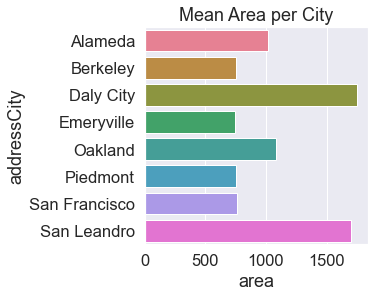

In [29]:
#create the bar plot to see the changes of all the countries
sns.set(font_scale=1.5) 
fig, axes = plt.subplots(1,1, figsize=(4, 4))
#set the color 
color = sns.color_palette('husl', len(mean_data.index))
sns.barplot(mean_data['area'], mean_data.index, palette = color,ax=axes)
axes.set(xlabel='area', title='Mean Area per City')

Max: San Leandro, 1,526sq.ft
    
Min: San Francisco, 760sq.ft
    
In fact, the area of these four cities (Berkeley, Daly City, San Francisco, Emeryville) is not much different. However, the min area we can rent is in San Francisco. 


[Text(0.5, 0, 'mean price'), Text(0.5, 1.0, 'Mean Price per City')]

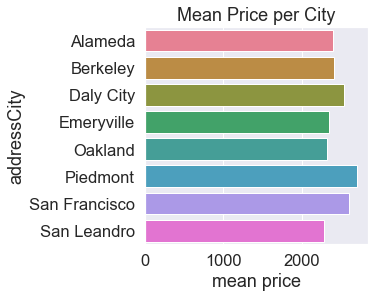

In [30]:
sns.set(font_scale=1.5) 
fig, axes = plt.subplots(1,1, figsize=(4, 4))
color = sns.color_palette('husl', len(mean_data.index))
sns.barplot(mean_data['Price'], mean_data.index, palette = color,ax=axes)
axes.set(xlabel='mean price', title='Mean Price per City')

All the mean prices in 7 cities are more than 2,000 dollars per month.

Max: San Francisco, 2,587dollars per month

Min: San Leandro, 2,129 dollars per month


[Text(0.5, 0, 'Price Per Area'), Text(0.5, 1.0, 'Price Per Area')]

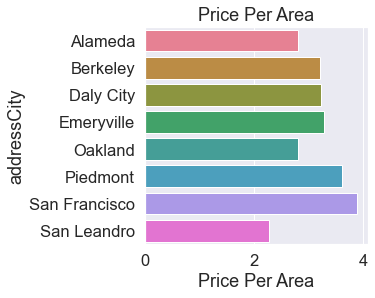

In [31]:
sns.set(font_scale=1.5) 
fig, axes = plt.subplots(1,1, figsize=(4, 4))
color = sns.color_palette('husl', len(mean_data.index))
sns.barplot(mean_data['Price Per Area'], mean_data.index, palette = color,ax=axes)
axes.set(xlabel='Price Per Area', title='Price Per Area')

Max: San Francisco,3.85 dollars

Min: San Leandro, 2.46 dollars

Mean price per area: 3.1 dollars

The high price in San Francisco elevates the price in 7 cities.

So, we consider that the location is an important factor affecting the housing price.


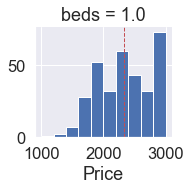

In [32]:
data1=data[data['beds'].isin([1])]
Price1 = data1['Price']
g = sns.FacetGrid(data1, col='beds')
g = g.map(plt.hist, 'Price')
plt.axvline(Price1.mean(), color='r', linestyle='--', linewidth=1)

There are a total of 340 apartments with only one bed. The mean price of an apartment in 1 bed: 2342 dollars per month. The lowest price is 1000 dollar per month.

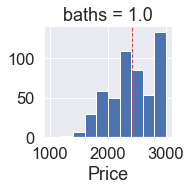

In [33]:
data2=data[data['baths'].isin([1])]
Price2 = data2['Price']
g = sns.FacetGrid(data2, col='baths')
g = g.map(plt.hist, 'Price')
plt.axvline(Price2.mean(), color='r', linestyle='--', linewidth=1)

There are a total of 535 apartments with only one bath. The mean price of an apartment in 1 bath: 2412 dollars per month. The lowest price is 1,000 dollars per month.
So, if we want to meet the most basic life needs, we can rent an apartment for 1,000 dollars per month.

In [34]:
data.groupby("addressCity").count()

,Price,address,addressStreet,beds,baths,area,Price Per Area
addressCity,,,,,,,
Alameda,24,24,24,24,24,24,24
Berkeley,1,1,1,1,1,1,1
Daly City,5,5,5,5,5,5,5
Emeryville,26,26,26,26,26,26,26
Oakland,267,267,267,267,267,267,267
Piedmont,1,1,1,1,1,1,1
San Francisco,249,249,249,249,249,249,249
San Leandro,12,12,12,12,12,12,12


In [35]:
san = data[data["addressCity"] == "San Francisco"]
oak = data[data["addressCity"] == "Oakland"]

In [36]:
oaksan = [oak, san]
oak_san = pd.concat(oaksan)
oak_san

,Price,address,addressStreet,addressCity,beds,baths,area,Price Per Area
0,"1,875.00","196 41st St APT 5, Oakland, CA 94611",196 41st St APT 5,Oakland,1.00,1.00,500.00,3.75
1,"2,335.00","1920 69th Ave #1922, Oakland, CA 94621",1920 69th Ave #1922,Oakland,2.00,1.00,888.00,2.63
2,"3,000.00","1 Kelton Ct APT 4A, Oakland, CA 94611",1 Kelton Ct APT 4A,Oakland,1.00,1.00,677.00,4.43
7,"1,750.00","2558 Fruitvale Ave, Oakland, CA 94601",2558 Fruitvale Ave,Oakland,1.00,1.00,"13,369.00",0.13
8,"1,975.00","3063 22nd Ave, Oakland, CA 94602",3063 22nd Ave,Oakland,1.00,1.00,742.00,2.66
...,...,...,...,...,...,...,...,...
572,"2,745.00","369 Staples Ave, San Francisco, CA 94112",369 Staples Ave,San Francisco,2.00,1.00,550.00,4.99
574,"2,480.00","601 Van Ness Ave, San Francisco, CA 94102",601 Van Ness Ave,San Francisco,1.00,1.00,694.00,3.57
575,"2,650.00","491 Frederick St APT 3, San Francisco, CA 94117",491 Frederick St APT 3,San Francisco,1.00,1.00,500.00,5.30
578,"2,850.00","126 Holloway Ave #126, San Francisco, CA 94112",126 Holloway Ave #126,San Francisco,2.00,1.00,"1,200.00",2.38


In [37]:
cities = ['Oakland', 'San Francisco']

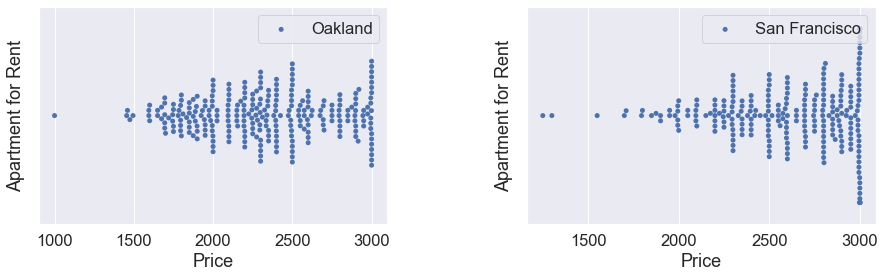

In [38]:
fig = plt.figure(figsize=(15,10)) 
fig.subplots_adjust(hspace=0.5, wspace = 0.4)#spaces between plots
n = 1
for city in cities:
    ax = fig.add_subplot(len(cities),2,n) 
    info = oak_san[oak_san["addressCity"] == city]["Price"]
    sns.swarmplot(info)
    plt.xlabel('Price')
    plt.ylabel('Apartment for Rent')
    ax.legend([city],loc = 'upper right') #title of the single plot
    n = n+1

plt.show()

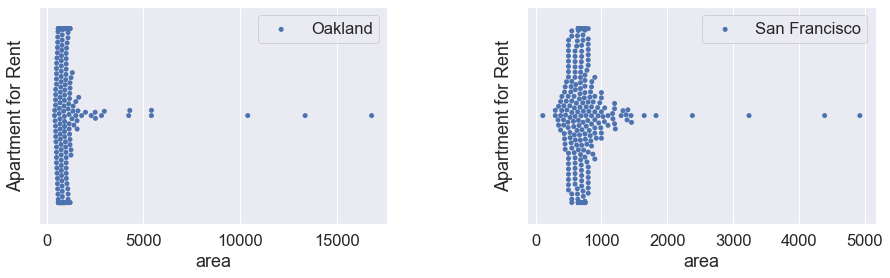

In [39]:
fig = plt.figure(figsize=(15,10)) 
fig.subplots_adjust(hspace=0.5, wspace = 0.4)#spaces between plots
n = 1
for city in cities:
    ax = fig.add_subplot(len(cities),2,n) 
    info = oak_san[oak_san["addressCity"] == city]["area"]
    sns.swarmplot(info)
    plt.xlabel('area')
    plt.ylabel('Apartment for Rent')
    ax.legend([city],loc = 'upper right') #title of the single plot
    n = n+1

plt.show()

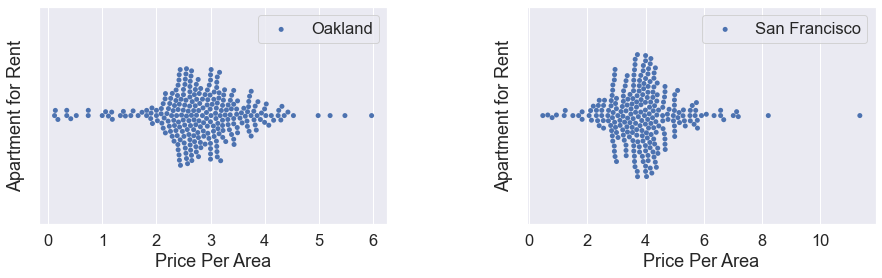

In [40]:
fig = plt.figure(figsize=(15,10)) 
fig.subplots_adjust(hspace=0.5, wspace = 0.4)#spaces between plots
n = 1
for city in cities:
    ax = fig.add_subplot(len(cities),2,n) 
    info = oak_san[oak_san["addressCity"] == city]["Price Per Area"]
    sns.swarmplot(info)
    plt.xlabel('Price Per Area')
    plt.ylabel('Apartment for Rent')
    ax.legend([city],loc = 'upper right') #title of the single plot
    n = n+1

plt.show()

## Webdriver for Grabbing real-time data
The above analysis is based on the data we scraped two weeks ago. Users could use the analysis to make better decision about where to rent, how much should I pay for rent and so on. 

Eexcept for providing the suggestions about the rent fee, we also want to give the users the latest information about the apartment for rent now, so we use the webdriver to build an automated scraping programme. 

In any time, the user wants to have the latest information, we will run the programme, which can scrap the key information including address, price and the detailed link, then auto update to the online google sheet we created. 

In [41]:
import sys
!{sys.executable} -m pip install selenium
!{sys.executable} -m pip install chromedriver-autoinstaller

In [42]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import time

In [43]:
header = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36",
    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8"
}

In [44]:
response = requests.get('https://www.zillow.com/san-francisco-ca/rentals/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22mapBounds%22%3A%7B%22west%22%3A-122.77407683325195%2C%22east%22%3A-122.20759428930664%2C%22south%22%3A37.58563344358383%2C%22north%22%3A37.908142595089735%7D%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A20330%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22fr%22%3A%7B%22value%22%3Atrue%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A11%7D', headers = header)
data = response.text
soup = BeautifulSoup(data, "html.parser")

In [45]:
all_link_elements = soup.select(".list-card-top a")

all_links = []
for link in all_link_elements:
    href = link["href"]
    if "http" not in href:
        all_links.append(f"https://www.zillow.com{href}")
    else:
        all_links.append(href)
all_links

['https://www.zillow.com/b/edgewater-san-francisco-ca-5XjVQc/',
 'https://www.zillow.com/b/avalon-hayes-valley-san-francisco-ca-5Yy6Gw/',
 'https://www.zillow.com/homedetails/74-States-St-San-Francisco-CA-94114/2097906199_zpid/',
 'https://www.zillow.com/homedetails/1761-9th-Ave-San-Francisco-CA-94122/2067439820_zpid/',
 'https://www.zillow.com/b/112-columbus-avenue-san-francisco-ca-9NLy8M/',
 'https://www.zillow.com/homedetails/3434-State-Highway-1-San-Francisco-CA-94118/2079318820_zpid/',
 'https://www.zillow.com/b/891-post-st.-san-francisco-ca-5XxcR8/',
 'https://www.zillow.com/homedetails/1125-Francisco-St-APT-8-San-Francisco-CA-94109/15070571_zpid/',
 'https://www.zillow.com/homedetails/102-Richland-Ave-San-Francisco-CA-94110/2067440175_zpid/']

In [46]:
all_address_elements = soup.select(".list-card-info address")
all_addresses = [address.get_text().split(" | ")[-1] for address in all_address_elements]
all_addresses 

['355 Berry St, San Francisco, CA',
 '325 Octavia St, San Francisco, CA',
 '74 States St, San Francisco, CA 94114',
 '1761 9th Ave, San Francisco, CA 94122',
 '112 Columbus Ave, San Francisco, CA',
 '3434 State Highway 1, San Francisco, CA 94118',
 '891 Post St, San Francisco, CA',
 '1125 Francisco St APT 8, San Francisco, CA 94109',
 '102 Richland Ave, San Francisco, CA 94110']

In [47]:
all_price_elements = soup.select(".list-card-price")
all_prices = [price.get_text().split("+")[0] for price in all_price_elements if "$" in price.text]
all_prices

['$2,634 Studio',
 '$2,702',
 '$4,695/mo',
 '$4,500/mo',
 '$1,300',
 '$3,000/mo',
 '$1,795',
 '$4,995/mo',
 '$3,750/mo']

In [50]:
import chromedriver_autoinstaller
chromedriver_autoinstaller.install()  
browser = webdriver.Chrome()

The process could scrap the information and fill in the google sheet where we have created the questions. The final result will also include the date when we scarp.

It makes sure that we could get the latest information about the apartment for rent and clean the apartment which has been rent.

In [51]:
for n in range(len(all_links)):
    # my own Google Form URL 
    browser.get("https://docs.google.com/forms/d/e/1FAIpQLScEm7SDwSYvZgtLB9MNkyb6OKp3eJcQFTZxtWA-LtdIwjkD-Q/viewform?usp=sf_link")

    time.sleep(2)
    address = browser.find_element_by_xpath(
        '//*[@id="mG61Hd"]/div[2]/div/div[2]/div[1]/div/div/div[2]/div/div[1]/div/div[1]/input')
    price = browser.find_element_by_xpath(
        '//*[@id="mG61Hd"]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/div[1]/div/div[1]/input')
    link = browser.find_element_by_xpath(
        '//*[@id="mG61Hd"]/div[2]/div/div[2]/div[3]/div/div/div[2]/div/div[1]/div/div[1]/input')
    submit_button = browser.find_element_by_xpath('//*[@id="mG61Hd"]/div[2]/div/div[3]/div[1]/div[1]/div/span/span')

    address.send_keys(all_addresses[n])
    price.send_keys(all_prices[n])
    link.send_keys(all_links[n])
    submit_button.click()